# CH 13 Loading and Preprocessing Data with TensorFlow


In [1]:
import tensorflow as tf

## Loading Data


### The tf.data API


In [3]:
help(tf.data)

Help on package tensorflow._api.v2.data in tensorflow._api.v2:

NAME
    tensorflow._api.v2.data - `tf.data.Dataset` API for input pipelines.

DESCRIPTION
    See [Importing Data](https://tensorflow.org/guide/data) for an overview.

PACKAGE CONTENTS
    experimental (package)

DATA
    AUTOTUNE = -1
    INFINITE_CARDINALITY = -1
    UNKNOWN_CARDINALITY = -2

FILE
    c:\users\sayed\.conda\envs\homl3\lib\site-packages\tensorflow\_api\v2\data\__init__.py




In [4]:
tf.range(10)

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [6]:
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10))
dataset

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [9]:
try :
    dataset[0]
except Exception as ex:
    print(ex)

'_TensorSliceDataset' object is not subscriptable


In [10]:
len(dataset)

10

In [15]:
it = iter(dataset)
print(next(it))
print(next(it))
print(next(it))

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)


In [16]:
for item in dataset:
    print(item)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [17]:
X_nested = {"a": ([1, 2, 3], [4, 5, 6]), "b": [7, 8, 9]}
dataset = tf.data.Dataset.from_tensor_slices(X_nested)

for item in dataset:
    print(item)

{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=4>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=7>}
{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=5>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=8>}
{'a': (<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=6>), 'b': <tf.Tensor: shape=(), dtype=int32, numpy=9>}


In [25]:
# let's try using unbalanced dict
try :
    X_nested = {"a": ([1, 2, 3], [4, 5, 6]), "b": [7, 8, 9,10]}
    dataset = tf.data.Dataset.from_tensor_slices(X_nested)

    for item in dataset:
        print(item)
except Exception as ex:
    print('ERROR: ',ex)

ERROR:  Dimensions 3 and 4 are not compatible


### Chaining Transformation


In [34]:
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10))
dataset = dataset.repeat(3)
print(list(dataset.as_numpy_iterator()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [38]:
list(dataset.batch(batch_size=8).as_numpy_iterator())

[array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([8, 9, 0, 1, 2, 3, 4, 5]),
 array([6, 7, 8, 9, 0, 1, 2, 3]),
 array([4, 5, 6, 7, 8, 9])]

In [79]:
dataset = tf.data.Dataset.from_tensor_slices(tf.range(10)).repeat(200)
print(list(dataset.as_numpy_iterator())[:20])

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [80]:
len(dataset)

2000

In [81]:
batched_data = dataset.batch(batch_size=8,drop_remainder=True)

num_parallel_calls
(Optional.) A tf.int64 scalar tf.Tensor, representing the number of batches to compute asynchronously in parallel. If not specified, batches will be computed sequentially. If the value tf.data.AUTOTUNE is used, then the number of parallel calls is set dynamically based on available resources.


In [82]:
parallel_batched_data = dataset.batch(batch_size=8,drop_remainder=True,
                            num_parallel_calls=tf.data.AUTOTUNE)

In [85]:
list(parallel_batched_data.as_numpy_iterator())[:4]

[array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([8, 9, 0, 1, 2, 3, 4, 5]),
 array([6, 7, 8, 9, 0, 1, 2, 3]),
 array([4, 5, 6, 7, 8, 9, 0, 1])]

#### map


In [93]:
mapped_data = batched_data.map(lambda x : x*3)
list(mapped_data.as_numpy_iterator())[:4]

[array([ 0,  3,  6,  9, 12, 15, 18, 21]),
 array([24, 27,  0,  3,  6,  9, 12, 15]),
 array([18, 21, 24, 27,  0,  3,  6,  9]),
 array([12, 15, 18, 21, 24, 27,  0,  3])]

In [95]:
def exp_func(x):
    return tf.exp(float(x))

mapped_data = batched_data.map(exp_func)
list(mapped_data.as_numpy_iterator())[:4]

[array([1.0000000e+00, 2.7182817e+00, 7.3890562e+00, 2.0085537e+01,
        5.4598148e+01, 1.4841316e+02, 4.0342877e+02, 1.0966332e+03],
       dtype=float32),
 array([2.9809580e+03, 8.1030835e+03, 1.0000000e+00, 2.7182817e+00,
        7.3890562e+00, 2.0085537e+01, 5.4598148e+01, 1.4841316e+02],
       dtype=float32),
 array([4.0342877e+02, 1.0966332e+03, 2.9809580e+03, 8.1030835e+03,
        1.0000000e+00, 2.7182817e+00, 7.3890562e+00, 2.0085537e+01],
       dtype=float32),
 array([5.4598148e+01, 1.4841316e+02, 4.0342877e+02, 1.0966332e+03,
        2.9809580e+03, 8.1030835e+03, 1.0000000e+00, 2.7182817e+00],
       dtype=float32)]

#### filter


In [122]:
filtered_data = dataset.filter(lambda x : x>5)
list(filtered_data.as_numpy_iterator())[:5]

[6, 7, 8, 9, 6]

In [124]:
try :
    filtered_data = batched_data.filter(lambda x : x>5)
    list(filtered_data.as_numpy_iterator())[:5]
except Exception as ex:
    print("ERROR",ex)


Invalid `predicate`. `predicate` must return a `tf.bool` scalar tensor, but its return type is TensorSpec(shape=(8,), dtype=tf.bool, name=None).


In [134]:
filtered_data = batched_data.filter(lambda x : tf.reduce_min(x)==0)
list(filtered_data.as_numpy_iterator())[:5]

[array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([8, 9, 0, 1, 2, 3, 4, 5]),
 array([6, 7, 8, 9, 0, 1, 2, 3]),
 array([4, 5, 6, 7, 8, 9, 0, 1]),
 array([0, 1, 2, 3, 4, 5, 6, 7])]

In [140]:
list(filtered_data.take(3).as_numpy_iterator())

[array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([8, 9, 0, 1, 2, 3, 4, 5]),
 array([6, 7, 8, 9, 0, 1, 2, 3])]

#### Shuffle


buffer_size
A tf.int64 scalar tf.Tensor, representing the number of elements from this dataset from which the new dataset will sample. To uniformly shuffle the entire dataset, use buffer_size=dataset.cardinality().

Randomly shuffles the elements of this dataset.

This dataset fills a buffer with buffer_size elements, then randomly samples elements from this buffer, replacing the selected elements with new elements. For perfect shuffling, a buffer size greater than or equal to the full size of the dataset is required.

For instance, if your dataset contains 10,000 elements but buffer_size is set to 1,000, then shuffle will initially select a random element from only the first 1,000 elements in the buffer. Once an element is selected, its space in the buffer is replaced by the next (i.e. 1,001-st) element, maintaining the 1,000 element buffer.


In [157]:
dataset = tf.data.Dataset.range(10).repeat(2).shuffle(buffer_size=4, seed=42, reshuffle_each_iteration=False).batch(7)
list(dataset.as_numpy_iterator())

[array([0, 1, 3, 4, 5, 2, 6], dtype=int64),
 array([0, 9, 1, 7, 2, 3, 8], dtype=int64),
 array([5, 8, 7, 9, 4, 6], dtype=int64)]

### Interleaving Lines from Multiple Files


In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [4]:
import numpy as np
from pathlib import Path

def save_to_csv_files(data, name_prefix, header=None, n_parts=10):
    housing_dir = Path()/'datasets'/'housing'
    housing_dir.mkdir(parents=True, exist_ok=True)
    filename_format = "my_{}_{:02d}.csv"
    

    filepaths = []
    m = len(data)
    chunks = np.array_split(np.arange(m), n_parts)
    for file_idx, row_indices in enumerate(chunks):
        part_csv = housing_dir/ filename_format.format(name_prefix, file_idx)
        filepaths.append(str(part_csv))
        with open(part_csv,'w') as f:
            if header is not None:
                f.write(header)
                f.write('\n')
            for row_idx in row_indices:
                f.write(','.join([repr(col) for col in data[row_idx]]))
                f.write('\n')
    return filepaths

In [8]:
train_data = np.c_[X_train,y_train]
valid_data = np.c_[X_valid, y_valid]
test_data = np.c_[X_test,y_test]

header_cols = housing.feature_names + ['MedianHouseValue']
header = ','.join(header_cols)

train_filepaths = save_to_csv_files(train_data, "train", header, n_parts=20)
valid_filepaths = save_to_csv_files(valid_data, "valid", header, n_parts=10)
test_filepaths = save_to_csv_files(test_data, "test", header, n_parts=10)

In [9]:
train_filepaths

['datasets\\housing\\my_train_00.csv',
 'datasets\\housing\\my_train_01.csv',
 'datasets\\housing\\my_train_02.csv',
 'datasets\\housing\\my_train_03.csv',
 'datasets\\housing\\my_train_04.csv',
 'datasets\\housing\\my_train_05.csv',
 'datasets\\housing\\my_train_06.csv',
 'datasets\\housing\\my_train_07.csv',
 'datasets\\housing\\my_train_08.csv',
 'datasets\\housing\\my_train_09.csv',
 'datasets\\housing\\my_train_10.csv',
 'datasets\\housing\\my_train_11.csv',
 'datasets\\housing\\my_train_12.csv',
 'datasets\\housing\\my_train_13.csv',
 'datasets\\housing\\my_train_14.csv',
 'datasets\\housing\\my_train_15.csv',
 'datasets\\housing\\my_train_16.csv',
 'datasets\\housing\\my_train_17.csv',
 'datasets\\housing\\my_train_18.csv',
 'datasets\\housing\\my_train_19.csv']

#### Building an Input Pipeline


In [14]:
filepath_dataset = tf.data.Dataset.list_files(train_filepaths, seed=42)
list(filepath_dataset.as_numpy_iterator())[:3]

[b'datasets\\housing\\my_train_05.csv',
 b'datasets\\housing\\my_train_16.csv',
 b'datasets\\housing\\my_train_01.csv']

In [15]:
n_readers = 5
dataset = filepath_dataset.interleave(lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
                                    cycle_length=n_readers)

In [16]:
for line in dataset.take(5):    
    print(line)

tf.Tensor(b'4.5909,16.0,5.475877192982456,1.0964912280701755,1357.0,2.9758771929824563,33.63,-117.71,2.418', shape=(), dtype=string)
tf.Tensor(b'2.4792,24.0,3.4547038327526134,1.1341463414634145,2251.0,3.921602787456446,34.18,-118.38,2.0', shape=(), dtype=string)
tf.Tensor(b'4.2708,45.0,5.121387283236994,0.953757225433526,492.0,2.8439306358381504,37.48,-122.19,2.67', shape=(), dtype=string)
tf.Tensor(b'2.1856,41.0,3.7189873417721517,1.0658227848101265,803.0,2.0329113924050635,32.76,-117.12,1.205', shape=(), dtype=string)
tf.Tensor(b'4.1812,52.0,5.701388888888889,0.9965277777777778,692.0,2.4027777777777777,33.73,-118.31,3.215', shape=(), dtype=string)


### Preprocessing the Data


In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [22]:
X_mean, X_std = scaler.mean_, scaler.scale_
n_inputs = len(X_train[0])

def parse_csv_line(line):
    defs = [0.]*n_inputs + [tf.constant([],dtype=tf.float32)]
    fields = tf.io.decode_csv(line, record_defaults=defs)
    return tf.stack(fields[:-1]),tf.stack(fields[-1:])

def preprocess(line):
    x,y = parse_csv_line(line)
    return (x-X_mean)/X_std, y

In [23]:
preprocess(b'4.2083,44.0,5.3232,0.9171,846.0,2.3370,37.47,-122.2,2.782')


(<tf.Tensor: shape=(8,), dtype=float32, numpy=
 array([ 0.16579159,  1.216324  , -0.05204564, -0.39215982, -0.5277444 ,
        -0.2633488 ,  0.8543046 , -1.3072058 ], dtype=float32)>,
 <tf.Tensor: shape=(1,), dtype=float32, numpy=array([2.782], dtype=float32)>)

#### Putting Everything Together + Prefetching


In [24]:
def csv_reader_dataset(filepaths, n_readers=5, n_read_threads=None,
                    n_parse_threads=5, shuffle_buffer_size=10_000, seed=42,
                    batch_size=32):
    dataset = tf.data.Dataset.list_files(filepaths, seed=seed)
    dataset = dataset.interleave(
        lambda filepath: tf.data.TextLineDataset(filepath).skip(1),
        cycle_length=n_readers, num_parallel_calls=n_read_threads)
    dataset = dataset.map(preprocess, num_parallel_calls=n_parse_threads)
    dataset = dataset.shuffle(shuffle_buffer_size, seed=seed)
    return dataset.batch(batch_size).prefetch(1)

In [25]:
example_set = csv_reader_dataset(train_filepaths, batch_size=3)
for X_batch, y_batch in example_set.take(2):
    print("X =", X_batch)
    print("y =", y_batch)
    print()

X = tf.Tensor(
[[-1.3957452  -0.04940685 -0.22830808  0.22648273  2.2593622   0.35200632
   0.9667386  -1.4121602 ]
 [ 2.7112627  -1.0778131   0.69413143 -0.14870553  0.51810503  0.3507294
  -0.82285154  0.80680597]
 [-0.13484643 -1.868895    0.01032507 -0.13787179 -0.12893449  0.03143518
   0.2687057   0.13212144]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[1.819]
 [3.674]
 [0.954]], shape=(3, 1), dtype=float32)

X = tf.Tensor(
[[ 0.09031774  0.9789995   0.1327582  -0.13753782 -0.23388447  0.10211545
   0.97610843 -1.4121602 ]
 [ 0.05218809 -2.0271113   0.2940109  -0.02403445  0.16218767 -0.02844518
   1.4117942  -0.93737936]
 [-0.672276    0.02970133 -0.76922584 -0.15086786  0.4962024  -0.02741998
  -0.7853724   0.77182245]], shape=(3, 8), dtype=float32)
y = tf.Tensor(
[[2.725]
 [1.205]
 [1.625]], shape=(3, 1), dtype=float32)



In [26]:
train_set = csv_reader_dataset(train_filepaths)
valid_set = csv_reader_dataset(valid_filepaths)
test_set = csv_reader_dataset(test_filepaths)

In [27]:

# extra code – for reproducibility
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [28]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(30, activation="relu", kernel_initializer="he_normal",
                          input_shape=X_train.shape[1:]),
    tf.keras.layers.Dense(1),
])
model.compile(loss="mse", optimizer="sgd")
model.fit(train_set, validation_data=valid_set, epochs=5)

Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 1.4317 - val_loss: 8.0618
Epoch 2/5
363/363 [==============================] - 1s 1ms/step - loss: 0.5839 - val_loss: 18.9707
Epoch 3/5
363/363 [==============================] - 1s 1ms/step - loss: 0.5907 - val_loss: 24.1491
Epoch 4/5
363/363 [==============================] - 1s 1ms/step - loss: 0.6116 - val_loss: 0.8673
Epoch 5/5
363/363 [==============================] - 1s 1ms/step - loss: 0.4509 - val_loss: 0.3947


In [29]:
# extra code – defines the optimizer and loss function for training
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.mean_squared_error

n_epochs = 5
for epoch in range(n_epochs):
    for X_batch, y_batch in train_set:
        # extra code – perform one Gradient Descent step
        #              as explained in Chapter 12
        print("\rEpoch {}/{}".format(epoch + 1, n_epochs), end="")
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Epoch 5/5

In [30]:
@tf.function
def train_one_epoch(model, optimizer, loss_fn, train_set):
    for X_batch, y_batch in train_set:
        with tf.GradientTape() as tape:
            y_pred = model(X_batch)
            main_loss = tf.reduce_mean(loss_fn(y_batch, y_pred))
            loss = tf.add_n([main_loss] + model.losses)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
loss_fn = tf.keras.losses.mean_squared_error
for epoch in range(n_epochs):
    print("\rEpoch {}/{}".format(epoch + 1, n_epochs), end="")
    train_one_epoch(model, optimizer, loss_fn, train_set)

Epoch 5/5

### The TFRecord Format


In [6]:
import os
os.makedirs('ignored', exist_ok=True)

In [7]:
with tf.io.TFRecordWriter('ignored/my_data.tfrecord') as f:
    f.write(b'First Line (record)')
    f.write(b'This is the second record in the file')


In [8]:
file_paths = ['ignored/my_data.tfrecord']
dataset = tf.data.TFRecordDataset(file_paths)

for item in dataset:
    print(item)

tf.Tensor(b'First Line (record)', shape=(), dtype=string)
tf.Tensor(b'This is the second record in the file', shape=(), dtype=string)


#### Compressed TFRecord Files


In [9]:
options = tf.io.TFRecordOptions(compression_type='GZIP')

with tf.io.TFRecordWriter('ignored/my_compressed_data.tfrecord',options=options) as f:
    f.write(b'Compressed files are quit small')
    print('Finished Writing')

dataset = tf.data.TFRecordDataset(filenames=['ignored/my_compressed_data.tfrecord'],
                                    compression_type='GZIP'
                                    )

print(type(dataset))
print(list(dataset))

Finished Writing
<class 'tensorflow.python.data.ops.readers.TFRecordDatasetV2'>
[<tf.Tensor: shape=(), dtype=string, numpy=b'Compressed files are quit small'>]


### A Brief Introduction to Protocol Buffers


In [19]:
%%writefile ignored/person.proto
syntax = "proto3";
message Person {
    string name = 1;
    int32 id = 2;
    repeated string email = 3;
}

Writing ignored/person.proto


In [20]:
!protoc ignored/person.proto --python_out=./ --descriptor_set_out=ignored/person.desc --include_imports

In [31]:
!dir ignored\person*


 Volume in drive E is 99
 Volume Serial Number is C8CB-0D59

 Directory of e:\99\GitHub\Data-Science\Educational\Hands-On-Machine-Learning\CH13 Loading and Preprocessing Data with TensorFlow\ignored

09/18/2024  05:40 PM               100 person.desc
09/18/2024  05:40 PM               114 person.proto
09/18/2024  05:40 PM             1,329 person_pb2.py
               3 File(s)          1,543 bytes
               0 Dir(s)  62,570,627,072 bytes free


In [2]:
from ignored.person_pb2 import Person

In [3]:
person = Person(name="Al", id=123, email=["a@b.com"])  # create a Person
print(person) 

name: "Al"
id: 123
email: "a@b.com"



In [5]:
person.name, person.id, person.email

('Al', 123, ['a@b.com'])

In [6]:
person.email[0]

'a@b.com'

In [8]:
person.email.append('email@g.com')

In [9]:
person.email

['a@b.com', 'email@g.com']

In [12]:
serialized = person.SerializeToString()
serialized

b'\n\x02Al\x10{\x1a\x07a@b.com\x1a\x0bemail@g.com'

In [14]:
person2 = Person()
person2.ParseFromString(serialized) # parse the byte string (28 bytes long)

28

In [15]:
person2 == person

True

##### Example of using tf.io.decode_proto() function


In [20]:
person_tf = tf.io.decode_proto(
    bytes = serialized,
    message_type ="Person",
    field_names = ['name','id','email'],
    output_types = [tf.string, tf.int32, tf.string],
    descriptor_source = 'ignored/person.desc'
)

In [22]:
person_tf.sizes

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 1, 2])>

In [23]:
person_tf.values

[<tf.Tensor: shape=(1,), dtype=string, numpy=array([b'Al'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([123])>,
 <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'email@g.com'], dtype=object)>]

<br>


```proto
Here is the definition of the tf.train.Example protobuf:

syntax = "proto3";

message BytesList { repeated bytes value = 1; }
message FloatList { repeated float value = 1 [packed = true]; }
message Int64List { repeated int64 value = 1 [packed = true]; }
message Feature {
    oneof kind {
        BytesList bytes_list = 1;
        FloatList float_list = 2;
        Int64List int64_list = 3;
    }
};
message Features { map<string, Feature> feature = 1; };
message Example { Features features = 1; };
```


In [8]:
from tensorflow.train import BytesList, FloatList, Int64List
from tensorflow.train import Feature, Features, Example

In [29]:
person_example = Example(
    features = Features(
        feature = {
            'name':Feature(bytes_list = BytesList(value=[b'Alice'])),
            'id':Feature(int64_list = Int64List(value=[123])),
            'email':Feature(bytes_list = BytesList(value=[b'a@b.com',b'c@d.com']))
        }
    )
)

In [34]:
type(person_example), type(Example), type(Feature)

(tensorflow.core.example.example_pb2.Example,
 google._upb._message.MessageMeta,
 google._upb._message.MessageMeta)

In [35]:
with tf.io.TFRecordWriter('ignored/my_contacts.tfrecord') as f:
    for _ in range(5):
        f.write(person_example.SerializeToString())


### Loading and Parsing Examples


In [40]:
feature_description = {
    'name': tf.io.FixedLenFeature([],tf.string, default_value=''),
    'id':tf.io.FixedLenFeature([],tf.int64, default_value=0),
    'email':tf.io.VarLenFeature(tf.string),
}

def parse(serialized_example):
    return tf.io.parse_single_example(serialized_example, feature_description)

In [41]:
dataset = tf.data.TFRecordDataset(['ignored/my_contacts.tfrecord']).map(parse)

In [42]:
for parsed_example in dataset:
    print(person_example)

features {
  feature {
    key: "name"
    value {
      bytes_list {
        value: "Alice"
      }
    }
  }
  feature {
    key: "id"
    value {
      int64_list {
        value: 123
      }
    }
  }
  feature {
    key: "email"
    value {
      bytes_list {
        value: "a@b.com"
        value: "c@d.com"
      }
    }
  }
}

features {
  feature {
    key: "name"
    value {
      bytes_list {
        value: "Alice"
      }
    }
  }
  feature {
    key: "id"
    value {
      int64_list {
        value: 123
      }
    }
  }
  feature {
    key: "email"
    value {
      bytes_list {
        value: "a@b.com"
        value: "c@d.com"
      }
    }
  }
}

features {
  feature {
    key: "name"
    value {
      bytes_list {
        value: "Alice"
      }
    }
  }
  feature {
    key: "id"
    value {
      int64_list {
        value: 123
      }
    }
  }
  feature {
    key: "email"
    value {
      bytes_list {
        value: "a@b.com"
        value: "c@d.com"
      }
    }

In [47]:
parsed_example['email'], parsed_example['email'].values, type(parsed_example['email'].values)

(SparseTensor(indices=tf.Tensor(
 [[0]
  [1]], shape=(2, 1), dtype=int64), values=tf.Tensor([b'a@b.com' b'c@d.com'], shape=(2,), dtype=string), dense_shape=tf.Tensor([2], shape=(1,), dtype=int64)),
 <tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>,
 tensorflow.python.framework.ops.EagerTensor)

In [50]:
tf.sparse.to_dense(parsed_example['email']), type(tf.sparse.to_dense(parsed_example['email']))

(<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'a@b.com', b'c@d.com'], dtype=object)>,
 tensorflow.python.framework.ops.EagerTensor)

##### Storing Images and Tensors in TFRecords


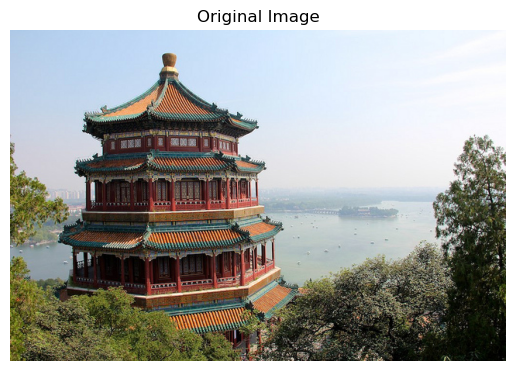

In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_sample_images

img = load_sample_images()["images"][0]
plt.imshow(img)
plt.axis("off")
plt.title("Original Image")
plt.show()

In [10]:
data = tf.io.encode_jpeg(img)
example_with_image = Example(features=Features(feature={
    "image": Feature(bytes_list=BytesList(value=[data.numpy()]))}))
serialized_example = example_with_image.SerializeToString()
with tf.io.TFRecordWriter("ignored/my_image.tfrecord") as f:
    f.write(serialized_example)

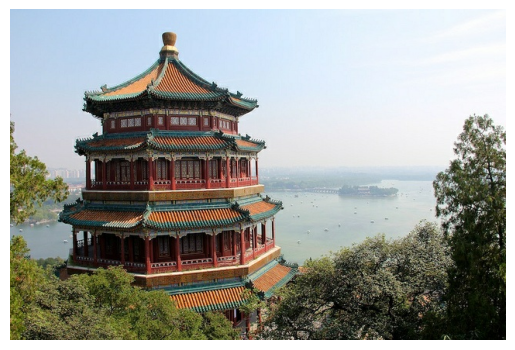

In [11]:
feature_description = { "image": tf.io.VarLenFeature(tf.string) }

def parse(serialized_example):
    example_with_image = tf.io.parse_single_example(serialized_example,
                                                    feature_description)
    return tf.io.decode_jpeg(example_with_image["image"].values[0])
    # or you can use tf.io.decode_image() instead

dataset = tf.data.TFRecordDataset("ignored/my_image.tfrecord").map(parse)
for image in dataset:
    plt.imshow(image)
    plt.axis("off")
    plt.show()

In [12]:
tensor = tf.constant([[0., 1.], [2., 3.], [4., 5.]])
serialized = tf.io.serialize_tensor(tensor)
serialized

<tf.Tensor: shape=(), dtype=string, numpy=b'\x08\x01\x12\x08\x12\x02\x08\x03\x12\x02\x08\x02"\x18\x00\x00\x00\x00\x00\x00\x80?\x00\x00\x00@\x00\x00@@\x00\x00\x80@\x00\x00\xa0@'>

In [13]:
tf.io.parse_tensor(serialized, out_type=tf.float32)


<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 1.],
       [2., 3.],
       [4., 5.]], dtype=float32)>

## Preprocessing Layers


### Normalization Layer


In [4]:
tf.random.set_seed(42)  # extra code – ensures reproducibility
norm_layer = tf.keras.layers.Normalization()
model = tf.keras.models.Sequential([
    norm_layer,
    tf.keras.layers.Dense(1)
])
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=2e-3))

norm_layer.adapt(X_train)
model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=5)


Epoch 1/5
363/363 [==============================] - 1s 1ms/step - loss: 2.8054 - val_loss: 1.1094
Epoch 2/5
363/363 [==============================] - 0s 1ms/step - loss: 0.6792 - val_loss: 1.5902
Epoch 3/5
363/363 [==============================] - 0s 1ms/step - loss: 0.5805 - val_loss: 1.0160
Epoch 4/5
363/363 [==============================] - 0s 1ms/step - loss: 0.5631 - val_loss: 0.7419
Epoch 5/5
363/363 [==============================] - 0s 1ms/step - loss: 0.5574 - val_loss: 0.5272


second method: process the data first then deliver it to the model..


In [5]:
norm_layer = tf.keras.layers.Normalization()
norm_layer.adapt(X_train)
X_train_scaled = norm_layer(X_train)
X_valid_scaled = norm_layer(X_valid)


In [6]:
model = tf.keras.models.Sequential([tf.keras.layers.Dense(1)])
model.compile(loss="mse", optimizer=tf.keras.optimizers.SGD(learning_rate=2e-3))
model.fit(X_train_scaled, y_train, epochs=5,
validation_data=(X_valid_scaled, y_valid))


Epoch 1/5
363/363 [==============================] - 1s 2ms/step - loss: 3.4017 - val_loss: 1.0859
Epoch 2/5
363/363 [==============================] - 1s 1ms/step - loss: 0.7850 - val_loss: 1.4701
Epoch 3/5
363/363 [==============================] - 0s 1ms/step - loss: 0.6485 - val_loss: 1.1568
Epoch 4/5
363/363 [==============================] - 0s 1ms/step - loss: 0.6173 - val_loss: 0.8203
Epoch 5/5
363/363 [==============================] - 0s 1ms/step - loss: 0.6001 - val_loss: 0.5695


In [10]:
final_model = tf.keras.Sequential([norm_layer, model])
X_new = X_test[:3]
y_pred = final_model(X_new)
y_pred

<tf.Tensor: shape=(3, 1), dtype=float32, numpy=
array([[0.94623077],
       [1.6315134 ],
       [2.3874626 ]], dtype=float32)>

using tf.data API and .map


In [11]:
dataset = tf.data.Dataset.from_tensor_slices((X_train,y_train)).batch(5)

In [12]:
dataset = dataset.map(lambda x,y : (norm_layer(x),y))

In [13]:
list(dataset.take(1))

[(<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
  array([[-0.19397898, -1.0778134 , -0.94338703,  0.01485134,  0.02073434,
          -0.5729169 ,  0.9292575 , -1.4221283 ],
         [ 0.7519828 , -1.8688954 ,  0.40547714, -0.23327859,  1.8614666 ,
           0.20516504, -0.91655123,  1.0966992 ],
         [-0.4146912 ,  0.02970134,  0.8180874 ,  1.0567816 , -0.08786613,
          -0.29983333,  1.3087244 , -1.6970019 ],
         [ 1.7188952 , -1.315138  ,  0.3266428 , -0.21955286, -0.337921  ,
          -0.11146676, -0.982138  ,  0.94177264],
         [-0.96207213, -1.2360299 , -0.05625897, -0.03124575,  1.709061  ,
          -0.3025704 , -0.8041154 ,  1.3265917 ]], dtype=float32)>,
  <tf.Tensor: shape=(5, 1), dtype=float64, numpy=
  array([[1.442],
         [1.687],
         [1.621],
         [2.621],
         [0.956]])>)]

rewrite normalization layer (practice for custom layers)


In [16]:
import numpy as np

In [17]:
class MyNormalization(tf.keras.layers.Layer):
    def adapt(self, X):
        self.mean_ = np.mean(X, axis=0, keepdims =True)
        self.std_ = np.std(X, axis=0, keepdims=True)
        
    def call(self, X):
        eps = tf.keras.backend.epsilon()
        return (X - self.mean_)/( self.std_ + eps)

In [18]:
my_norm_layer = MyNormalization()
my_norm_layer.adapt(X_train)
X_train_scaled = my_norm_layer(X_train)

### The Discretization Layer


In [20]:
age = tf.constant([[10.], [93.], [57.], [18.], [37.], [5.]])
discretize_layer = tf.keras.layers.Discretization(bin_boundaries=[18., 50.])
age_categories = discretize_layer(age)
age_categories


<tf.Tensor: shape=(6, 1), dtype=int64, numpy=
array([[0],
       [2],
       [2],
       [1],
       [1],
       [0]], dtype=int64)>

or specify num_bins, then call the layer’s adapt() method to
let it find the appropriate bin boundaries based on the value percentiles


In [22]:
discretize_layer = tf.keras.layers.Discretization(num_bins=3)
discretize_layer.adapt(age)
age_categories = discretize_layer(age)
age_categories


<tf.Tensor: shape=(6, 1), dtype=int64, numpy=
array([[1],
       [2],
       [2],
       [1],
       [2],
       [0]], dtype=int64)>

### The CategoryEncoding Layer


In [24]:
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3)
onehot_layer(age_categories)


<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)>

If you try to encode more than one categorical feature at a time (which only makes
sense if they all use the same categories)


In [25]:
two_age_categories = np.array([[1, 0], [2, 2], [2, 0]])
onehot_layer(two_age_categories)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 0.],
       [0., 0., 1.],
       [1., 0., 1.]], dtype=float32)>

In [26]:
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3, output_mode='count')
onehot_layer(two_age_categories)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[1., 1., 0.],
       [0., 0., 2.],
       [1., 0., 1.]], dtype=float32)>

escaping from losing information by multi-hot and count encode by:


In [35]:
two_age_categories + [0, 3]

array([[1, 3],
       [2, 5],
       [2, 3]])

In [34]:
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3+3)
onehot_layer(two_age_categories + [0, 3]) # broadcasting ( adding 3 to the second feature in all records )

<tf.Tensor: shape=(3, 6), dtype=float32, numpy=
array([[0., 1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0.]], dtype=float32)>

In [36]:
onehot_layer = tf.keras.layers.CategoryEncoding(num_tokens=3+3)
onehot_layer(two_age_categories) 

<tf.Tensor: shape=(3, 6), dtype=float32, numpy=
array([[1., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 1., 0., 0., 0.]], dtype=float32)>

In this output, the first three columns correspond to the first feature, and the last
three correspond to the second feature. This allows the model to distinguish the
two features.


### The StringLookup Layer


In [4]:
cities = ["Auckland", "Paris", "Paris", "San Francisco"]
str_lookup_layer = tf.keras.layers.StringLookup()
str_lookup_layer.adapt(cities)
print(str_lookup_layer([["Paris"], ["Auckland"], ["Auckland"], ["Montreal"]]))

tf.Tensor(
[[1]
 [3]
 [3]
 [0]], shape=(4, 1), dtype=int64)


In [15]:
print(str_lookup_layer.vocabulary_size())

4


In [16]:
str_lookup_layer = tf.keras.layers.StringLookup(num_oov_indices=5)
str_lookup_layer.adapt(cities)
str_lookup_layer([["Paris"], ["Auckland"], ["Foo"], ["Bar"], ["Baz"]])

<tf.Tensor: shape=(5, 1), dtype=int64, numpy=
array([[5],
       [7],
       [4],
       [3],
       [4]], dtype=int64)>

In [29]:
str_lookup_layer = tf.keras.layers.StringLookup(output_mode='one_hot',num_oov_indices=4)
str_lookup_layer.adapt(cities)
str_lookup_layer([["Paris"], ["Auckland"], ["Foo"], ["Bar"], ["Baz"]])

<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.]], dtype=float32)>

`integer look up layer` is the same


### Hashing Layer


In [33]:
hashing_layer = tf.keras.layers.Hashing(num_bins=12)
hashing_layer([["Paris"], ["Tokyo"], ["Auckland"], ["Montreal"]])


<tf.Tensor: shape=(4, 1), dtype=int64, numpy=
array([[ 6],
       [ 9],
       [11],
       [ 3]], dtype=int64)>

### Encoding Categorical Features Using Embeddings


In [34]:
tf.random.set_seed(42)
embedding_layer = tf.keras.layers.Embedding(input_dim=5, output_dim=2)
embedding_layer(np.array([2, 4, 2]))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.04982554, -0.02069281],
       [ 0.04636377, -0.04084412],
       [-0.04982554, -0.02069281]], dtype=float32)>

let's include string look up in the text encoding pipeline:


In [39]:
tf.random.set_seed(42)
ocean_prox = ["<1H OCEAN", "INLAND", "NEAR OCEAN", "NEAR BAY", "ISLAND"]
str_lookup_layer = tf.keras.layers.StringLookup()
str_lookup_layer.adapt(ocean_prox)

lookup_and_embed = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=[], dtype=tf.string),
    str_lookup_layer,
    tf.keras.layers.Embedding(input_dim = str_lookup_layer.vocabulary_size(), output_dim=2)
])

lookup_and_embed(np.array([["<1H OCEAN"], ["ISLAND"], ["<1H OCEAN"]]))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.01787315, -0.0264995 ],
       [-0.02353083,  0.00259434],
       [-0.01787315, -0.0264995 ]], dtype=float32)>

Putting everything together


In [42]:
tf.random.set_seed(42)
np.random.seed(42)

X_num = np.random.rand(12_000, 8)
X_cat = np.random.choice(ocean_prox, size=12_000)

X_train_num, X_valid_num = X_num[:10000], X_num[10000:]
X_train_cat, X_valid_cat = X_cat[:10000], X_cat[10000:]

y_train,y_valid = np.random.rand(10_000,1), np.random.rand(2000,1)

In [49]:
num_input = tf.keras.layers.Input(shape=X_train_num.shape[1:],name='num')
cat_input = tf.keras.layers.Input(shape=X_train_cat.shape[1:],dtype=tf.string, name='cat')

cat_embedding = lookup_and_embed(cat_input)
encoded_inputs = tf.keras.layers.concatenate([num_input, cat_embedding])
output = tf.keras.layers.Dense(1)(encoded_inputs)

model = tf.keras.models.Model(inputs= [num_input, cat_input], outputs = [output])
model.compile(loss='mse', optimizer='adam')


In [50]:
history = model.fit((X_train_num, X_train_cat), y_train, epochs=5,
                    validation_data=((X_valid_num, X_valid_cat), y_valid))

Epoch 1/5
313/313 [==============================] - 1s 2ms/step - loss: 0.1703 - val_loss: 0.1448
Epoch 2/5
313/313 [==============================] - 0s 1ms/step - loss: 0.1219 - val_loss: 0.1109
Epoch 3/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0996 - val_loss: 0.0958
Epoch 4/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0900 - val_loss: 0.0893
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0863 - val_loss: 0.0872


another fit method:


In [52]:
train_data = {'num':X_train_num , 'cat':X_train_cat}
valid_data = {'num':X_valid_num, 'cat':X_valid_cat}

history = model.fit(train_data, y_train, epochs=5,
                    validation_data=(valid_data, y_valid))

Epoch 1/5
313/313 [==============================] - 0s 2ms/step - loss: 0.0840 - val_loss: 0.0849
Epoch 2/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0840 - val_loss: 0.0847
Epoch 3/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0839 - val_loss: 0.0846
Epoch 4/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0838 - val_loss: 0.0847
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0839 - val_loss: 0.0851


In [58]:
lookup_and_embed(np.array([["<1H OCEAN"], ["ISLAND"], ["<1H OCEAN"]]))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.15724978,  0.11598238],
       [-0.16305865,  0.14446203],
       [-0.15724978,  0.11598238]], dtype=float32)>

we can see that the weights assigned to each word is different from earlier (it seems embedding layer gained a bit training )


## Text Preprocessing


In [4]:
text_vec_layer = tf.keras.layers.TextVectorization()
train_data = ["To be", "!(to be)", "That's the question", "Be, be, be."]
text_vec_layer.adapt(train_data)


In [5]:
text_vec_layer.get_vocabulary()

['', '[UNK]', 'be', 'to', 'the', 'thats', 'question']

In [6]:
text_vec_layer(["Be good!", "Question: be or be?"])

<tf.Tensor: shape=(2, 4), dtype=int64, numpy=
array([[2, 1, 0, 0],
       [6, 2, 1, 2]], dtype=int64)>

Ragged tensors in TensorFlow are a specialized form of tensors where different rows can have varying lengths.


In [9]:
text_vec_layer = tf.keras.layers.TextVectorization(standardize=None,ragged=True)
train_data = ["To be", "!(to be)", "That's the question", "Be, be, be."]
text_vec_layer.adapt(train_data)
print('The Vocabluray without standraization:\n',text_vec_layer.get_vocabulary())
print(text_vec_layer(["Be good!", "Question: be or be?"]))


The Vocabluray without standraization:
 ['', '[UNK]', 'the', 'question', 'be.', 'be,', 'be)', 'be', 'To', "That's", 'Be,', '!(to']
<tf.RaggedTensor [[1, 1], [1, 7, 1, 1]]>


try padding the max length sequence


In [16]:
text_vec_layer = tf.keras.layers.TextVectorization(output_sequence_length=8)
train_data = ["To be", "!(to be)", "That's the question", "Be, be, be.",'What A GOAL!','what are you saying?','what is that?']
text_vec_layer.adapt(train_data)
print('The Vocabluray',text_vec_layer.get_vocabulary())
print(text_vec_layer(["Be good!", "Question: be or be?",'How are you doing?','that goal is what iam saying!']))

The Vocabluray ['', '[UNK]', 'be', 'what', 'to', 'you', 'the', 'thats', 'that', 'saying', 'question', 'is', 'goal', 'are', 'a']
tf.Tensor(
[[ 2  1  0  0  0  0  0  0]
 [10  2  1  2  0  0  0  0]
 [ 1 13  5  1  0  0  0  0]
 [ 8 12 11  3  1  9  0  0]], shape=(4, 8), dtype=int64)


The word IDs must be encoded, typically using an Embedding layer:


we can get the output as `multi-hot` or `count`


In [20]:
text_vec_layer = tf.keras.layers.TextVectorization(output_mode='multi_hot')
train_data = ["To be", "!(to be)", "That's the question", "Be, be, be.",'What A GOAL!','what are you saying?','what is that?']
text_vec_layer.adapt(train_data)
print('The Vocabluray',text_vec_layer.get_vocabulary(), '\nVocabulary Length: ',len(text_vec_layer.get_vocabulary()))
print(text_vec_layer(["Be good!", "Question: be or be?",'How are you doing?','that goal is what iam saying!']))

The Vocabluray ['[UNK]', 'be', 'what', 'to', 'you', 'the', 'thats', 'that', 'saying', 'question', 'is', 'goal', 'are', 'a'] 
Vocabulary Length:  14
tf.Tensor(
[[1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0.]], shape=(4, 14), dtype=float32)


let's try `tf-idf`: which stands for term-frequency × inverse
document-frequency (TF-IDF). This is similar to the count encoding, but words that
occur frequently in the training data are downweighted, and conversely, rare words
are upweighted.


In [25]:
text_vec_layer = tf.keras.layers.TextVectorization(output_mode='tf_idf')

train_data = [
    "To be", "!(to be)", "That's the question", "Be, be, be.",
    'What A GOAL! BE', 'what are you saying? are are are', 
    'what is that? are'
]

text_vec_layer.adapt(train_data)

vocabulary = text_vec_layer.get_vocabulary()

input_text = ["Be good!", "Question: be or be?", 'How are you doing?', 'That goal goal is what I am saying!']
vectorized_output = text_vec_layer(input_text).numpy()

for i, text in enumerate(input_text):
    print(f"\nText: '{text}'")
    print("TF-IDF Encodings:")
    for idx, score in enumerate(vectorized_output[i]):
        if score > 0:  # Display only words with non-zero TF-IDF
            print(f"{vocabulary[idx]}: {score}")


Text: 'Be good!'
TF-IDF Encodings:
[UNK]: 1.3716702461242676
be: 0.8754687309265137

Text: 'Question: be or be?'
TF-IDF Encodings:
[UNK]: 1.3716702461242676
be: 1.7509374618530273
question: 1.504077434539795

Text: 'How are you doing?'
TF-IDF Encodings:
[UNK]: 2.743340492248535
are: 1.2039728164672852
you: 1.504077434539795

Text: 'That goal goal is what I am saying!'
TF-IDF Encodings:
[UNK]: 2.743340492248535
what: 1.0116009712219238
that: 1.504077434539795
saying: 1.504077434539795
is: 1.504077434539795
goal: 3.00815486907959


#### Using Pretrained Language Model Components


In [6]:
import tensorflow_hub as hub
hub_layer = hub.KerasLayer("https://tfhub.dev/google/nnlm-en-dim50/2")

In [21]:
sentence_embeddings = hub_layer(tf.constant(["man", "women"]))
sentence_embeddings.numpy().round(2)

array([[ 0.4 , -0.13, -0.1 , -0.01,  0.12,  0.2 ,  0.08, -0.02,  0.1 ,
        -0.16,  0.14, -0.06,  0.09,  0.22, -0.26,  0.15,  0.08, -0.01,
        -0.12, -0.16, -0.08,  0.05,  0.16,  0.2 , -0.09,  0.25, -0.09,
        -0.16,  0.1 ,  0.04, -0.23,  0.24, -0.25,  0.1 ,  0.04, -0.03,
         0.15, -0.  ,  0.07,  0.03,  0.05, -0.06, -0.09,  0.18,  0.06,
         0.2 , -0.05, -0.08, -0.03, -0.03],
       [-0.01,  0.07, -0.11, -0.12,  0.37,  0.  , -0.05, -0.12, -0.15,
         0.1 ,  0.04, -0.14,  0.12, -0.02, -0.11, -0.16,  0.21, -0.23,
        -0.06, -0.05,  0.07,  0.01,  0.1 , -0.34,  0.24,  0.26, -0.04,
         0.  ,  0.09,  0.15,  0.1 ,  0.26,  0.11, -0.03,  0.03, -0.03,
        -0.25,  0.05,  0.15, -0.22,  0.05, -0.16, -0.06,  0.09,  0.18,
         0.07,  0.08,  0.05, -0.  , -0.07]], dtype=float32)

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

In [23]:
embeddings = sentence_embeddings.numpy()
similarity = cosine_similarity([embeddings[0]], [embeddings[1]])
print(f"Cosine similarity between the sentences: {similarity[0][0]:.4f}")

Cosine similarity between the sentences: 0.1061


### Image Preprocessing Layers


In [33]:
# resizing
resizing_layer = tf.keras.layers.Resizing(height=100, width=200)
resizing_layer_without_dist = tf.keras.layers.Resizing(height=100, width=200, crop_to_aspect_ratio=True)

# rescaling
rescaling_layer = tf.keras.layers.Rescaling(scale=2/255, offset=-1) # range from (0-255) to (-1,1)

# center crop
center_crop_layer = tf.keras.layers.CenterCrop(height=100,width=100)

In [37]:
from sklearn.datasets import load_sample_images
import matplotlib.pyplot as plt

image = load_sample_images()['images'][0]

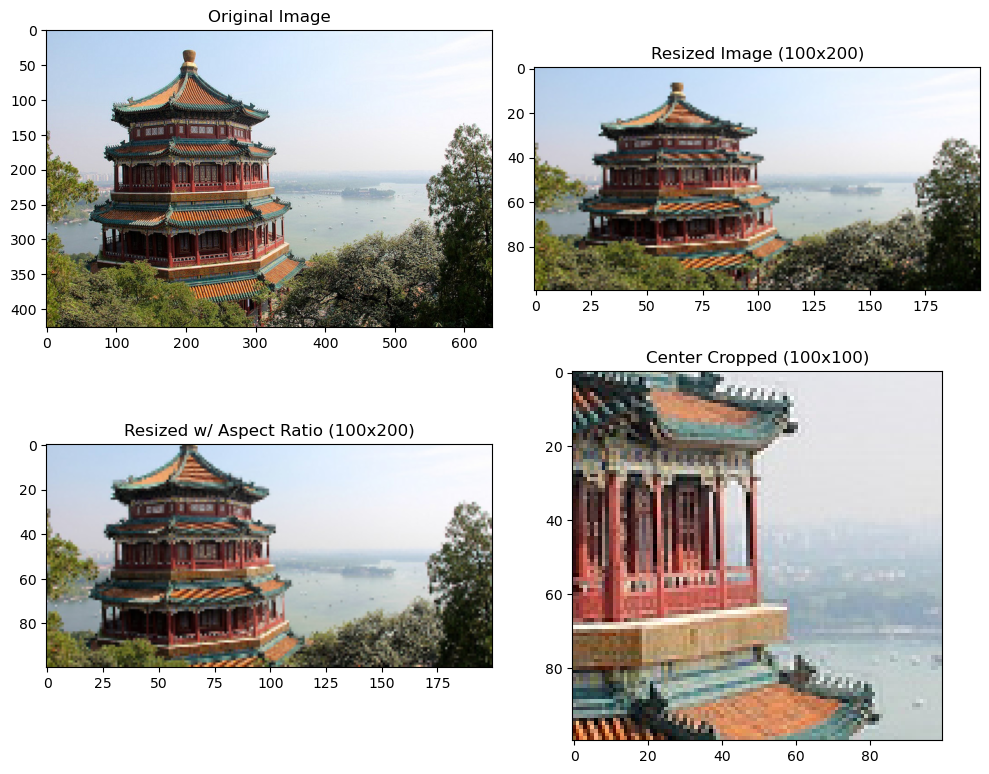

In [51]:
resized_image = resizing_layer(image)
resized_image_crop = resizing_layer_without_dist(image)
rescaled_image = rescaling_layer(image)
center_cropped_image = center_crop_layer(image)

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(2, 2, 2)
plt.imshow(resized_image/255.)
plt.title("Resized Image (100x200)")

plt.subplot(2, 2, 3)
plt.imshow(resized_image_crop/255.) 
plt.title("Resized w/ Aspect Ratio (100x200)")

plt.subplot(2, 2, 4)
plt.imshow(center_cropped_image/255.)
plt.title("Center Cropped (100x100)")

plt.tight_layout()
plt.show()


### The TensorFlow Datasets Project


the full list at: https://www.tensorflow.org/datasets/catalog/overview#all_datasets


In [6]:
import tensorflow_datasets as tfds

datasets = tfds.
mnist_train, mnist_test = datasets["train"], datasets["test"]

AttributeError: module 'tensorflow_datasets' has no attribute 'load'

there's some issue with versions, but pip has no broken things.
